# **Photobomb Remover**
## **This notebook deploys Flask service that uses maskrcnn resnet50 for instance segmentation, LaMa for inpainting, Redis for queueing and ngrok for tunneling**

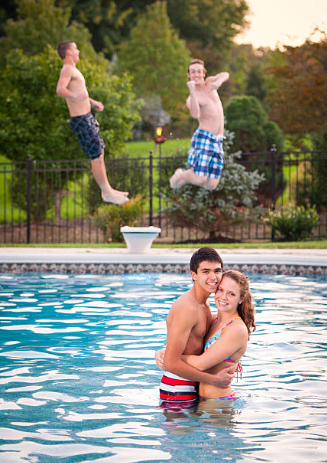 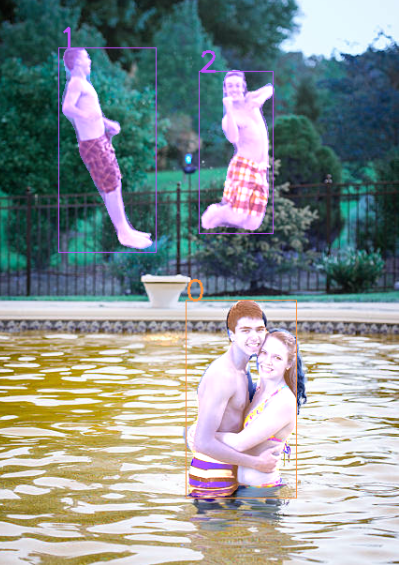 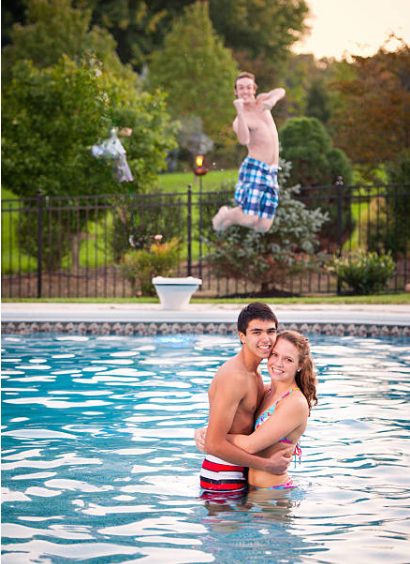

# **Clone from gitlab**


In [1]:
!git clone https://gitlab.com/the-best-one/photobomb-remover.git

Cloning into 'photobomb-remover'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


# **Change current working directory**

In [2]:
%cd photobomb-remover

/content/photobomb-remover


# **Make install script executable**

In [3]:
!chmod 777 ./install.sh

# **Run installation script**

In [4]:
!./install.sh

Cloning into 'lama'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (370/370), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 370 (delta 123), reused 316 (delta 107), pack-reused 0
Receiving objects: 100% (370/370), 6.52 MiB | 33.71 MiB/s, done.
Resolving deltas: 100% (123/123), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.4 MB 28.3 MB/s 
     |████████████████████████████████| 72 kB 843 kB/s 
     |████████████████████████████████| 144 kB 57.8 MB/s 
     |████████████████████████████████| 841 kB 59.3 MB/s 
     |████████████████████████████████| 271 kB 85.6 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 24.9 MB 1.2 MB/s 
     |████████████████████████████████| 101 kB 12.5 MB/s 
     |████████████████████████████████| 70 kB 10.4 MB/s 
     |████████████████████████████████| 236 kB 

# **Install ready-to-go Redis server**

In [5]:
%pip install redis-server

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.1 MB/s eta 0:00:00


# **Run redis server as a daemon**

In [6]:
import redis_server
!$redis_server.REDIS_SERVER_PATH --daemonize yes

# **Start Redis queue worker in background**

In [7]:
import subprocess
subprocess.Popen(["python", "redis_queue.py"]) 

# **Setting auth token**
**Go to [ngrok](https://dashboard.ngrok.com/get-started/your-authtoken) and copy your token. Registration is very easy. It is free and it is worth trying**

In [8]:
from getpass import getpass
authtoken = getpass('Enter authtoken: ')

Enter authtoken: ··········


In [11]:
!ngrok authtoken {authtoken}

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


# **Run the service. *Read the output*. It contains link to the service.**

In [ ]:
!flask --app ./flaskapp.py run

 * ngrok tunnel "http://d4b5-35-221-18-207.ngrok.io" -> "http://127.0.0.1:5000"
 * Serving Flask app './flaskapp.py'
 * Debug mode: off
 * Serving Flask app 'flaskapp'
 * Debug mode: off
Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
